In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.Survived.value_counts()
# So more people died than those that survived 

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.Sex.value_counts() 
# There were more males on the ship than females

male      577
female    314
Name: Sex, dtype: int64

In [15]:
pd.crosstab(df["Survived"], df["Sex"])
# More females survived than males - despite being lesser in number

Sex,female,male
Survived,,
0,81,468
1,233,109


In [17]:
(233/(233+81)), (109/(468+109))
# Female - 75 percent survival , Male - 19 percent survival rate

(0.7420382165605095, 0.18890814558058924)

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

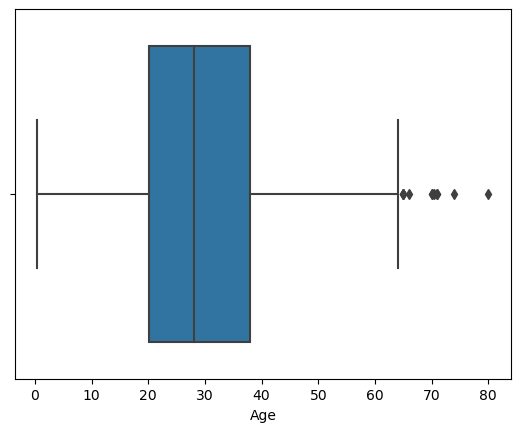

In [28]:
sns.boxplot("Age", data = df, orient='h' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

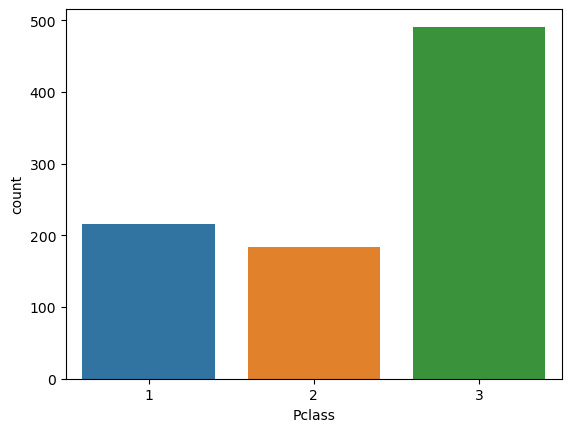

In [29]:
sns.countplot(x = "Pclass", data = df)
# Most passengers were in class 3.

<AxesSubplot:xlabel='Pclass'>

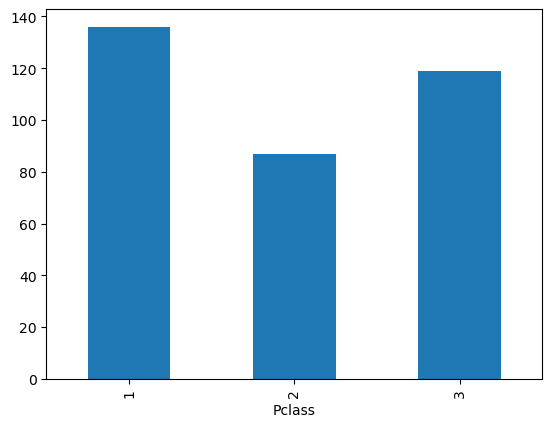

In [33]:
(df.groupby(by = "Pclass")["Survived"].sum()).plot(kind = "bar")
# Majority of people survived were of class 1.

<AxesSubplot:xlabel='Pclass'>

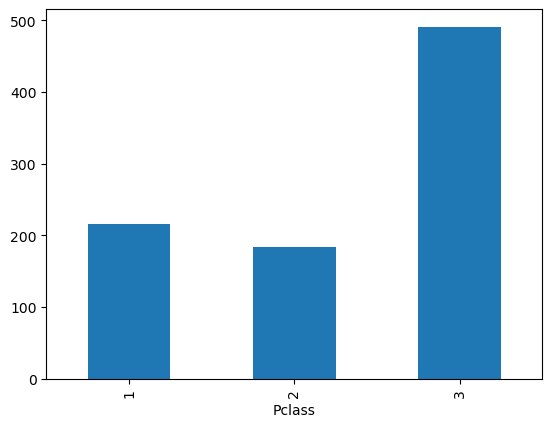

In [35]:
(df.groupby(by = "Pclass")["Pclass"].count()).plot(kind = "bar")
# So lower the number of class, morelikely is the person to survive.

In [45]:
age_category = []
for value in df["Age"]:
    if (not value):
        age_category.append(NaN)
    elif value < 20:
        age_category.append("Young")
    elif value < 40:
        age_category.append("Middle Age")
    else: 
        age_category.append("Old")
df["Age_Category"] = age_category

In [47]:
df["Age_Category"].value_counts()

Middle Age    387
Old           340
Young         164
Name: Age_Category, dtype: int64

<AxesSubplot:xlabel='Age_Category'>

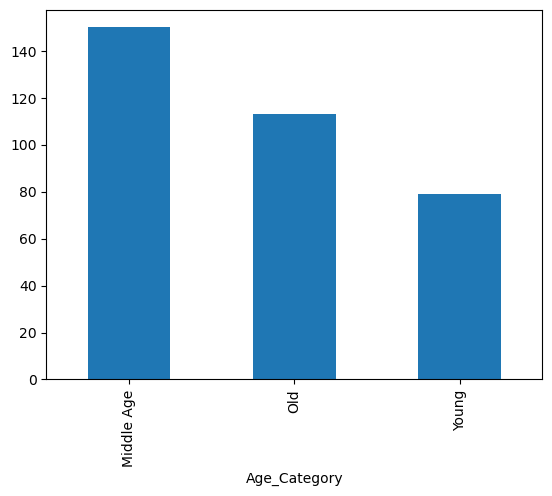

In [49]:
df.groupby(by = "Age_Category")["Survived"].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

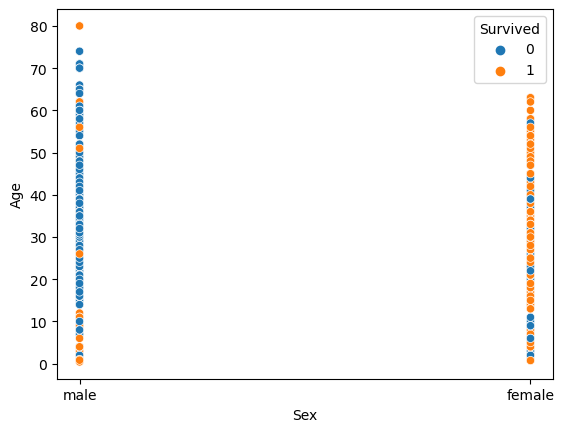

In [51]:
sns.scatterplot(x = "Sex", y = "Age", hue = "Survived", data = df)

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


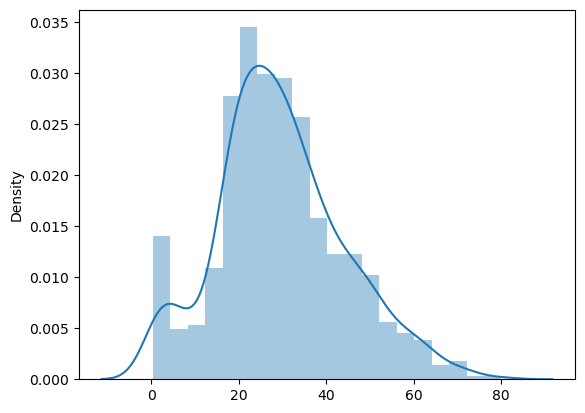

In [61]:
sns.distplot(x = df["Age"]);

0.38910778230082704

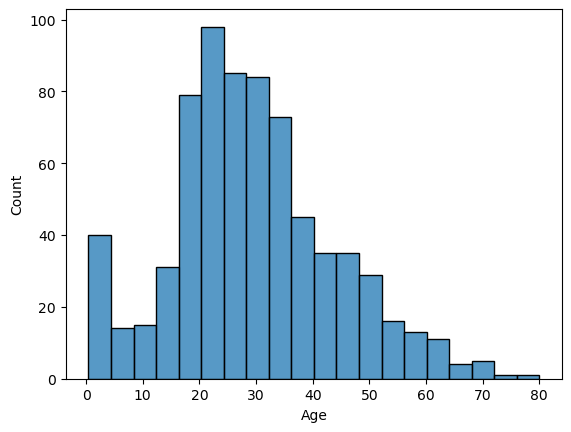

In [66]:
sns.histplot(x = df["Age"]);
# Age is roughly a normally distrubted plot
df["Age"].skew()


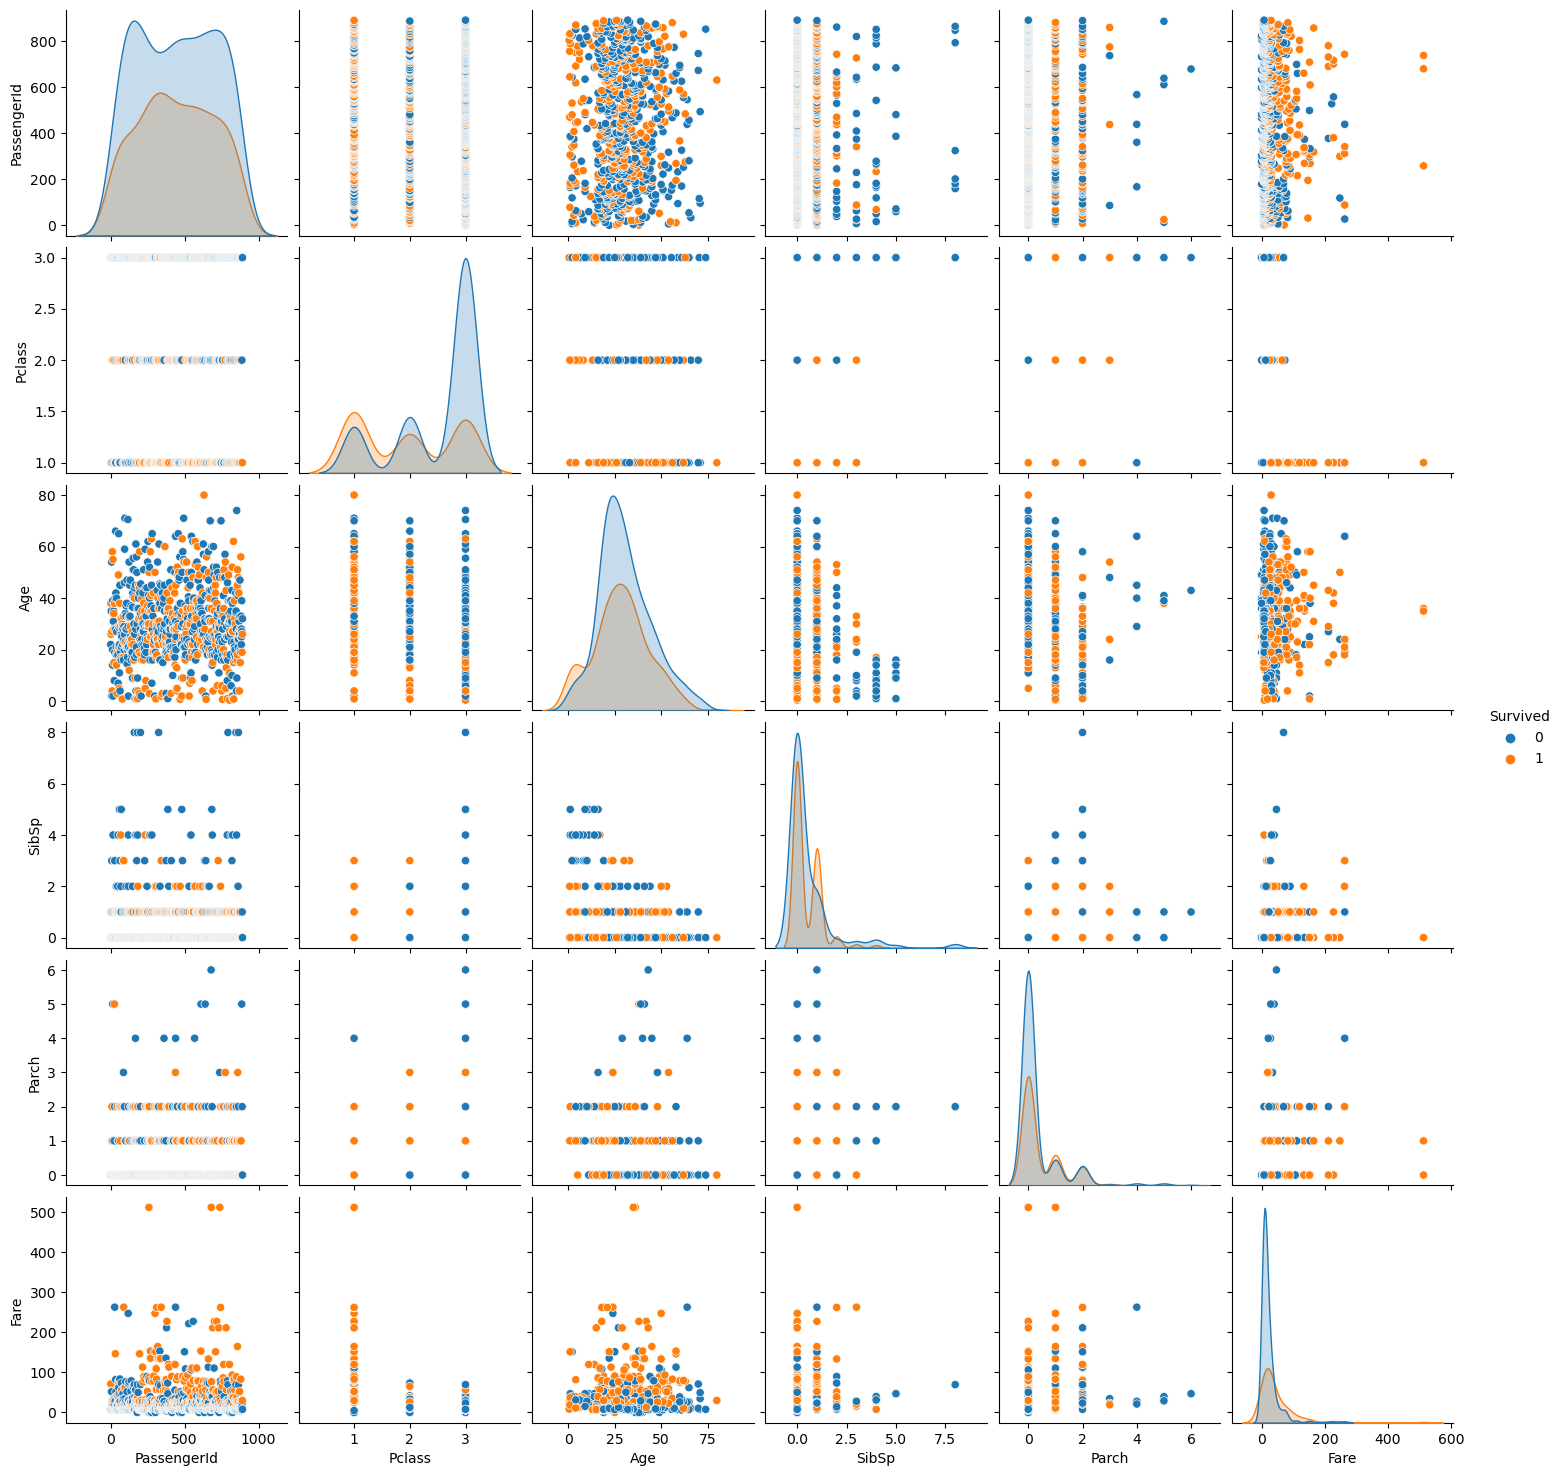

In [69]:
sns.pairplot(df, hue="Survived");

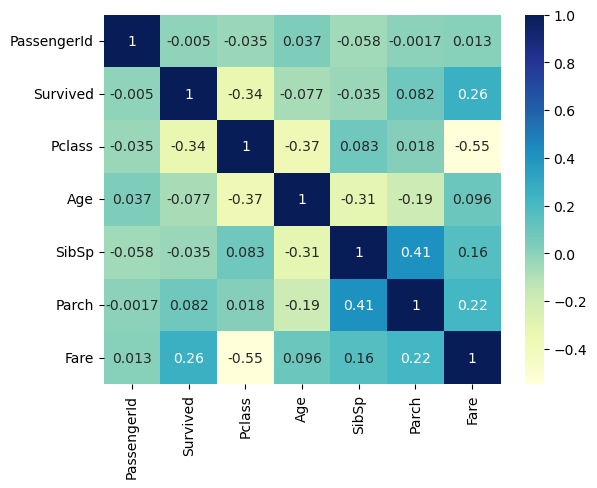

In [72]:
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu');

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_Category  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [75]:
df["Age"].fillna(df["Age"].median(), inplace = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_Category  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [81]:
df["Embarked"].fillna("S", inplace = True)

In [83]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Age_Category      0
dtype: int64

In [87]:
df.drop("Cabin", axis = 1, inplace = True)

In [88]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age_Category    0
dtype: int64

In [89]:
# Passenger ID and Names are useless (unique values per row indicate no patterns)
df.drop(["PassengerId","Name"], axis = 1, inplace = True)

In [102]:
df.drop("Ticket", axis = 1, inplace = True)

In [104]:
num_columns = df.select_dtypes("number").columns.to_list()
cat_columns = ["Sex","Embarked"]

<AxesSubplot:>

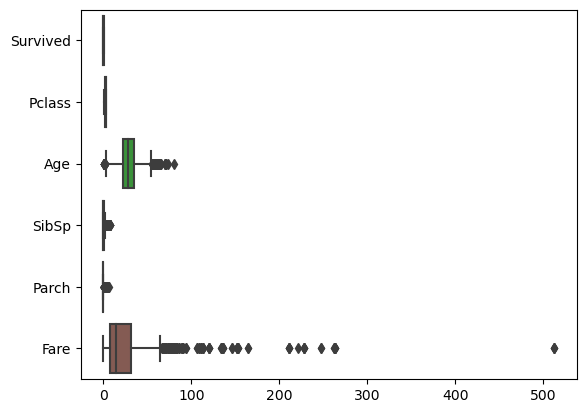

In [101]:
sns.boxplot(data = df, orient = 'h')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked      891 non-null    object 
 8   Age_Category  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [105]:
df[num_columns].skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [106]:
from scipy.stats import boxcox

In [111]:
df["Fare_transformed"] = boxcox(df["Fare"] + 1)[0]

In [114]:
df["Fare_transformed"].skew()

-0.04032918275876294

In [115]:
df_new = df.copy()

In [121]:
df_new = pd.get_dummies(df_new,columns=cat_columns)

In [147]:
X,y = df_new.drop(["Survived"], axis = 1), df_new["Survived"]

In [151]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
models = [RandomForestClassifier(), LogisticRegression(max_iter=1000), KNeighborsClassifier()]
results = []
for model in models:
    model.fit(X_train, y_train)
    results.append(model.score(X_test, y_test))
results

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0.8116591928251121, 0.8026905829596412, 0.7085201793721974]

In [153]:
df_new["Age_Category"].replace(to_replace={"Middle Age": 1, "Young": 0, "Old": 2},inplace= True)

In [161]:
from sklearn.preprocessing import MinMaxScaler
df_new[num_columns] = MinMaxScaler().fit_transform(df[num_columns])

In [165]:
df_new[num_columns].skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [167]:
df_new["Fare_transformed"] = boxcox(df_new["Fare"] + 1)[0]
df_new["Age_transformed"] = boxcox(df_new["Age"] + 1)[0]

In [168]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Category,Fare_transformed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_transformed
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1,0.012569,0,1,0,0,1,0.238348
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1,0.054297,1,0,1,0,0,0.382652
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1,0.013593,1,0,0,0,1,0.276573
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1,0.049274,1,0,0,0,1,0.357245
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1,0.013780,0,1,0,0,1,0.357245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1,0.020601,0,1,0,0,1,0.285890
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0,0.037193,1,0,0,0,1,0.208618
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,2,0.031846,1,0,0,0,1,0.295114
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1,0.037193,0,1,1,0,0,0.276573


In [201]:
X,y = df_new.drop(["Survived", "Age", "Fare", "Age_transformed","Fare_transformed"], axis = 1), df_new["Survived"]

In [202]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
models = [RandomForestClassifier(), LogisticRegression(max_iter=1000), KNeighborsClassifier()]
results = []
for model in models:
    model.fit(X_train, y_train)
    results.append(model.score(X_test, y_test))
results

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0.7802690582959642, 0.7982062780269058, 0.7847533632286996]

In [175]:
from sklearn.preprocessing import StandardScaler
df_new[["Age_transformed","Fare_transformed"]] = StandardScaler().fit_transform(df_new[["Age_transformed","Fare_transformed"]])

In [176]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Category,Fare_transformed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_transformed
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,1,-0.952383,0,1,0,0,1,-0.528610
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1,1.622166,1,0,1,0,0,0.705181
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1,-0.889236,1,0,0,0,1,-0.201788
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1,1.312227,1,0,0,0,1,0.487957
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,1,-0.877696,0,1,0,0,1,0.487957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,1,-0.456855,0,1,0,0,1,-0.122132
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0,0.566892,1,0,0,0,1,-0.782809
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,2,0.236957,1,0,0,0,1,-0.043264
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,1,0.566892,0,1,1,0,0,-0.201788


In [183]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category,Fare_transformed
0,0.0,1.0,male,0.271174,0.125,0.0,0.014151,S,Middle Age,1.906724
1,1.0,0.0,female,0.472229,0.125,0.0,0.139136,C,Middle Age,3.497640
2,1.0,1.0,female,0.321438,0.000,0.0,0.015469,S,Middle Age,1.970459
3,1.0,0.0,female,0.434531,0.125,0.0,0.103644,S,Middle Age,3.304258
4,0.0,1.0,male,0.434531,0.000,0.0,0.015713,S,Middle Age,1.981680


In [184]:
unaltered_df = pd.read_csv("train.csv")
df_new[["Pclass","SibSp","Parch"]] = unaltered_df[["Pclass","SibSp","Parch"]]

In [189]:
df_new.Age = unaltered_df["Age"]

In [190]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Category,Fare_transformed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_transformed
0,0.0,3,22.0,1,0,0.014151,1,-0.952383,0,1,0,0,1,-0.528610
1,1.0,1,38.0,1,0,0.139136,1,1.622166,1,0,1,0,0,0.705181
2,1.0,3,26.0,0,0,0.015469,1,-0.889236,1,0,0,0,1,-0.201788
3,1.0,1,35.0,1,0,0.103644,1,1.312227,1,0,0,0,1,0.487957
4,0.0,3,35.0,0,0,0.015713,1,-0.877696,0,1,0,0,1,0.487957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,0.025374,1,-0.456855,0,1,0,0,1,-0.122132
887,1.0,1,19.0,0,0,0.058556,0,0.566892,1,0,0,0,1,-0.782809
888,0.0,3,NaN,1,2,0.045771,2,0.236957,1,0,0,0,1,-0.043264
889,1.0,1,26.0,0,0,0.058556,1,0.566892,0,1,1,0,0,-0.201788


In [196]:
age_category = []
for value in df_new["Age"]:
    if (value < 4):
        age_category.append(0)
    elif value < 30:
        age_category.append(1)
    elif value < 60:
        age_category.append(2)
    else: 
        age_category.append(3)
df_new["Age_Category"] = age_category

In [197]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Category,Fare_transformed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_transformed
0,0.0,3,22.0,1,0,0.014151,1,-0.952383,0,1,0,0,1,-0.528610
1,1.0,1,38.0,1,0,0.139136,2,1.622166,1,0,1,0,0,0.705181
2,1.0,3,26.0,0,0,0.015469,1,-0.889236,1,0,0,0,1,-0.201788
3,1.0,1,35.0,1,0,0.103644,2,1.312227,1,0,0,0,1,0.487957
4,0.0,3,35.0,0,0,0.015713,2,-0.877696,0,1,0,0,1,0.487957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,0.025374,1,-0.456855,0,1,0,0,1,-0.122132
887,1.0,1,19.0,0,0,0.058556,1,0.566892,1,0,0,0,1,-0.782809
888,0.0,3,NaN,1,2,0.045771,3,0.236957,1,0,0,0,1,-0.043264
889,1.0,1,26.0,0,0,0.058556,1,0.566892,0,1,1,0,0,-0.201788
